In [30]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [31]:
#load the dataset
df = pd.read_csv(r"C:\Users\Quang\Downloads\project-data.csv")
df.dropna(subset=['compliance'], inplace=True)
df = df.drop(df[df['risk'] == -1].index)
df.head(5)

,project,risk,status,compliance,report_count,has_schedule,scope,office,month,year,day,risk_previous1,risk_previous2,risk_previous3,project_risk_likelihood,estimated_days_finish,report_word_count,poa_word_count,manager_risk_likelihood,manager_project_count
18,f6ce6c23349862fbbd8019bf412e96bdcfef0702,0,in progress,0.9857,27,1,Setorial,DG,3,2015,30.00000,0,0,0,0.014286,108.00000,100.0,1.0,0.021277,2
19,f6ce6c23349862fbbd8019bf412e96bdcfef0702,0,in progress,0.9857,27,1,Setorial,DG,3,2015,2.00000,0,0,0,0.014286,136.00000,17.0,59.0,0.021277,2
20,f6ce6c23349862fbbd8019bf412e96bdcfef0702,0,in progress,0.9857,27,1,Setorial,DG,4,2015,30.00000,0,0,0,0.012048,77.00000,64.0,1.0,0.016667,1
21,f6ce6c23349862fbbd8019bf412e96bdcfef0702,0,no report,0.9857,27,1,Setorial,DG,5,2015,17.13933,0,0,0,0.010309,206.89418,34.0,18.0,0.013514,1
22,f6ce6c23349862fbbd8019bf412e96bdcfef0702,0,in progress,0.9857,27,1,Setorial,DG,6,2015,30.00000,0,0,0,0.009009,122.00000,66.0,10.0,0.011364,1


In [32]:
df = df.drop(['project'], axis=1)

In [33]:
#seperate feature X and target variable y
X = df.drop('risk', axis=1)
y = df['risk']

print(X)

           status  compliance  report_count  has_schedule     scope office  \
18    in progress      0.9857            27             1  Setorial     DG   
19    in progress      0.9857            27             1  Setorial     DG   
20    in progress      0.9857            27             1  Setorial     DG   
21      no report      0.9857            27             1  Setorial     DG   
22    in progress      0.9857            27             1  Setorial     DG   
...           ...         ...           ...           ...       ...    ...   
1016  in progress      0.5444            31             1  Setorial    DRH   
1017  in progress      0.5444            31             1  Setorial    DRH   
1018  in progress      0.5444            31             1  Setorial    DRH   
1019  in progress      0.5444            31             1  Setorial    DRH   
1020  in progress      0.5444            31             1  Setorial    DRH   

      month  year       day  risk_previous1  risk_previous2  ri

In [34]:
#encode categorical columns
categorical_columns = ['status','scope','office']
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [35]:
#preprocess the data
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [36]:
X[numerical_columns]

,compliance,report_count,has_schedule,month,year,day,risk_previous1,risk_previous2,risk_previous3,project_risk_likelihood,estimated_days_finish,report_word_count,poa_word_count,manager_risk_likelihood,manager_project_count
18,0.615431,1.169032,0.412774,-1.015495,-0.854056,1.281846,-0.508490,-0.281594,-0.144338,-0.122688,-0.066401,0.321382,-0.873388,-0.286902,-0.163718
19,0.615431,1.169032,0.412774,-1.015495,-0.854056,-1.624747,-0.508490,-0.281594,-0.144338,-0.122688,-0.041549,-0.550486,1.169785,-0.286902,-0.163718
20,0.615431,1.169032,0.412774,-0.694329,-0.854056,1.281846,-0.508490,-0.281594,-0.144338,-0.333528,-0.093915,-0.056778,-0.873388,-0.613841,-0.855284
21,0.615431,1.169032,0.412774,-0.373164,-0.854056,-0.053180,-0.508490,-0.281594,-0.144338,-0.497385,0.021373,-0.371910,-0.274527,-0.837465,-0.855284
22,0.615431,1.169032,0.412774,-0.051998,-0.854056,1.281846,-0.508490,-0.281594,-0.144338,-0.619908,-0.053975,-0.035769,-0.556344,-0.989935,-0.855284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,-1.731767,1.593033,0.412774,-1.015495,1.170883,-1.728554,1.966609,-0.281594,-0.144338,0.877138,-0.066401,-0.035769,1.169785,0.156092,-0.163718
1017,-1.731767,1.593033,0.412774,-0.694329,1.170883,0.970426,-0.508490,-0.281594,-0.144338,0.689103,-0.085927,-0.560990,-0.873388,-0.015417,-0.855284
1018,-1.731767,1.593033,0.412774,-0.373164,1.170883,1.385653,-0.508490,-0.281594,-0.144338,0.617438,-0.085040,-0.550486,-0.873388,-0.080030,-0.855284
1019,-1.731767,1.593033,0.412774,-0.051998,1.170883,-0.053180,-0.508490,-0.281594,-0.144338,0.550379,0.021373,0.605001,0.570924,-0.140117,-0.855284


In [37]:
#train/test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
X_train

,status,compliance,report_count,has_schedule,scope,office,month,year,day,risk_previous1,risk_previous2,risk_previous3,project_risk_likelihood,estimated_days_finish,report_word_count,poa_word_count,manager_risk_likelihood,manager_project_count
235,8,-0.941390,-0.632973,0.412774,0,1,0.269167,1.170883,-0.053180,-0.50849,-0.281594,-0.144338,1.486107,0.021373,0.037762,0.148198,0.621897,-0.855284
713,5,0.026637,-0.526973,0.412774,1,0,-0.373164,1.170883,0.970426,-0.50849,-0.281594,-0.144338,-1.121112,0.111111,-0.032111,-0.046012,-1.509881,-0.855284
375,9,0.691490,-1.056974,0.412774,1,0,0.590333,-0.854056,-0.053180,-0.50849,-0.281594,-0.144338,-0.690067,0.021373,-0.032111,-0.046012,0.375188,0.527849
769,5,0.387785,0.215029,0.412774,2,5,-1.657826,1.170883,0.970426,-0.50849,-0.281594,-0.144338,0.213846,0.285072,-0.088291,0.112971,-0.384496,-0.855284
280,5,-1.081275,-1.056974,-2.422635,1,0,-1.015495,1.170883,-0.053180,-0.50849,-0.281594,-0.144338,-0.686835,0.021373,-0.032111,-0.046012,-0.819880,-0.163718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,5,0.397891,0.957031,0.412774,1,0,-1.015495,1.170883,1.385653,-0.50849,-0.281594,-0.144338,0.095151,-0.081490,-0.088291,-0.873388,1.457388,0.527849
205,9,-4.272571,-1.480975,-2.422635,1,0,0.911498,-0.854056,-0.053180,-0.50849,-0.281594,-0.144338,-0.765617,0.021373,-0.032111,-0.046012,-1.156927,-0.163718
403,9,0.691490,-1.162974,0.412774,1,0,1.553829,-0.854056,-0.053180,-0.50849,-0.281594,-0.144338,-0.956706,0.021373,-0.032111,-0.046012,-1.355351,-0.163718
654,8,-0.372275,0.533030,-2.422635,2,3,-0.051998,1.170883,-0.794292,-0.50849,-0.281594,-0.144338,0.550379,-0.044212,0.037762,0.465243,-0.140117,-0.855284


In [39]:
naive_bayes = GaussianNB()
naive_bayes2 = GaussianNB()
naive_bayes3 = GaussianNB()

In [40]:
naive_bayes.fit(X_train, y_train)
naive_bayes2.fit(X_train2, y_train2)
naive_bayes3.fit(X_train3, y_train3)

GaussianNB()

In [49]:
naive_bayes.coef_

AttributeError: 'GaussianNB' object has no attribute 'coef_'

In [41]:
y_pred = naive_bayes.predict(X_test)
y_pred2 = naive_bayes2.predict(X_test2)
y_pred3 = naive_bayes3.predict(X_test3)

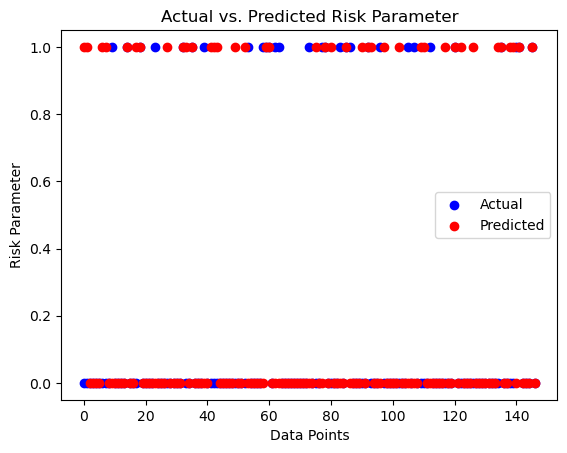

In [42]:
# Plotting the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Risk Parameter')
plt.title('Actual vs. Predicted Risk Parameter')
plt.legend()

# Show the plot
plt.show()

In [43]:
#Model evaluation
#Check the testing and training set accuracy to see if the model is overfitting
train_accuracy = naive_bayes.score(X_train, y_train)
test_accuracy = naive_bayes.score(X_test, y_test)
train_accuracy2 = naive_bayes2.score(X_train2, y_train2)
test_accuracy2 = naive_bayes2.score(X_test2, y_test2)
train_accuracy3 = naive_bayes3.score(X_train3, y_train3)
test_accuracy3 = naive_bayes3.score(X_test3, y_test3)
#Accuracy between the actual y and predicted y
accuracy = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy3 = accuracy_score(y_test3, y_pred3)
#Calculate F1 score
f1 = f1_score(y_pred, y_test, average="weighted")
f1_2 = f1_score(y_pred2, y_test2, average="weighted")
f1_3 = f1_score(y_pred3, y_test3, average="weighted")

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Accuracy:", accuracy)
print("F1 score:", f1)
print("----------------------------------------")
print("Training Accuracy 2:", train_accuracy2)
print("Testing Accuracy 2:", test_accuracy2)
print("Accuracy 2:", accuracy2)
print("F1 score 2:", f1_2)
print("----------------------------------------")
print("Training Accuracy 3:", train_accuracy3)
print("Testing Accuracy 3:", test_accuracy3)
print("Accuracy 3:", accuracy3)
print("F1 score 3:", f1_3)

Training Accuracy: 0.7193877551020408
Testing Accuracy: 0.7142857142857143
Accuracy: 0.7142857142857143
F1 score: 0.6995984234401725
----------------------------------------
Training Accuracy 2: 0.7337367624810892
Testing Accuracy 2: 0.7432432432432432
Accuracy 2: 0.7432432432432432
F1 score 2: 0.7341112824983792
----------------------------------------
Training Accuracy 3: 0.7178988326848249
Testing Accuracy 3: 0.7149321266968326
Accuracy 3: 0.7149321266968326
F1 score 3: 0.7062617918614238


True Positives: 92
True Negatives: 26
False Positives: 16
False Negatives: 13


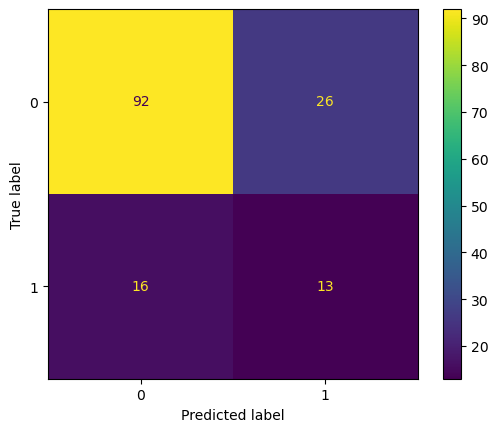

In [44]:
#Use confusion matrix to evaluate model 
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
TP = cm[0, 0]  
TN = cm[0, 1]  
FP = cm[1, 0]  
FN = cm[1, 1] 

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

True Positives: 138
True Negatives: 36
False Positives: 27
False Negatives: 20


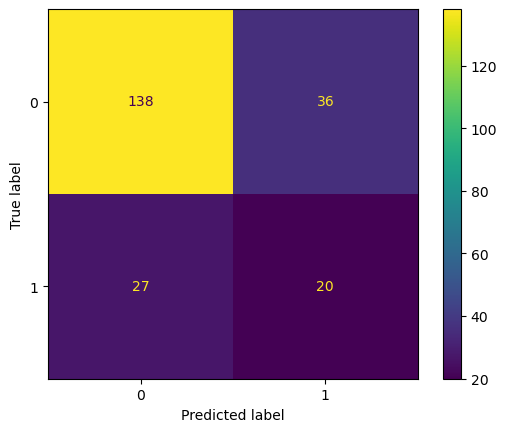

In [45]:
#Use confusion matrix to evaluate model 
labels = [0,1]
cm = confusion_matrix(y_test3, y_pred3, labels=labels)
TP = cm[0, 0]  
TN = cm[0, 1]  
FP = cm[1, 0]  
FN = cm[1, 1] 

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       118
           1       0.33      0.45      0.38        29

    accuracy                           0.71       147
   macro avg       0.59      0.61      0.60       147
weighted avg       0.75      0.71      0.73       147

Confusion Matrix:
[[92 26]
 [16 13]]


True Positives: 49
True Negatives: 11
False Positives: 8
False Negatives: 6


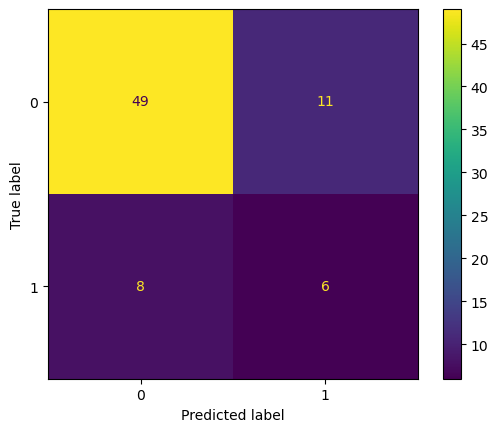

In [47]:
#Use confusion matrix to evaluate model 
labels = [0,1]
cm = confusion_matrix(y_test2, y_pred2, labels=labels)
TP = cm[0, 0]  
TN = cm[0, 1]  
FP = cm[1, 0]  
FN = cm[1, 1] 

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       118
           1       0.33      0.45      0.38        29

    accuracy                           0.71       147
   macro avg       0.59      0.61      0.60       147
weighted avg       0.75      0.71      0.73       147



In [52]:
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        60
           1       0.35      0.43      0.39        14

    accuracy                           0.74        74
   macro avg       0.61      0.62      0.61        74
weighted avg       0.76      0.74      0.75        74



In [53]:
print("Classification Report:")
print(classification_report(y_test3, y_pred3))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       174
           1       0.36      0.43      0.39        47

    accuracy                           0.71       221
   macro avg       0.60      0.61      0.60       221
weighted avg       0.73      0.71      0.72       221

